# Over View

This task is Microsoft Malware Prediction. It is mainly based on data preprocessing and machine learning methods to make accurate predictions to achieve data prediction of malware. The main difficulty of this task is the excessive amount of data. The total data is 7.9GB, which is far beyond the memory of ordinary computers, and memory errors are prone to occur. Therefore, in this processing, for the labeled data, only the first 1,000,000 rows are selected for processing to improve the efficiency and running time of data processing. At the same time, in order to compress the memory usage as much as possible, this task restricts the types of each data, so that the data can achieve the smallest memory footprint without changing its value. 

The model used in this task is XGBoost, which is a Boost model, generally composed of a series of decision trees, and its performance is very good. In the end, an AUC value of 0.72 was achieved on the selected data set, which is relatively good.

In [ ]:
Author: Yi Hou & Oliver He

First, import the third-party libraries needed for this task, among which pandas and numpy are used for data processing, xgboost is the model used in this task, and other sklean libraries are used to assist data processing and model training.

In [165]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score,f1_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sb

Because the data dimension of this task is very high, there are 83 columns in total. After careful selection, 41 columns that I think may be useful are selected as the data set of this task

In [26]:
features= [  
    'AVProductStatesIdentifier'
    ,'AVProductsEnabled'
    ,'IsProtected'
    ,'Processor'
    ,'OsSuite'
    ,'IsProtected'
    ,'RtpStateBitfield'
    ,'AVProductsInstalled'
    ,'Wdft_IsGamer'
    ,'DefaultBrowsersIdentifier'
    ,'OsBuild'
    ,'Wdft_RegionIdentifier'
    ,'SmartScreen'
    ,'CityIdentifier'
    ,'AppVersion'
    ,'Census_IsSecureBootEnabled'
    ,'Census_PrimaryDiskTypeName'
    ,'Census_SystemVolumeTotalCapacity'
    ,'Census_HasOpticalDiskDrive'
    ,'Census_IsWIMBootEnabled'
    ,'Census_IsVirtualDevice'
    ,'Census_IsTouchEnabled'
    ,'Census_FirmwareVersionIdentifier'
    ,'GeoNameIdentifier'
    ,'IeVerIdentifier'
    ,'Census_FirmwareManufacturerIdentifier'
    ,'Census_InternalPrimaryDisplayResolutionHorizontal'
    ,'Census_InternalPrimaryDisplayResolutionVertical'
    ,'Census_OEMModelIdentifier'
    ,'Census_ProcessorModelIdentifier'
    ,'Census_OSVersion'
    ,'Census_InternalPrimaryDiagonalDisplaySizeInInches'
    ,'Census_OEMNameIdentifier'
    ,'Census_ChassisTypeName'
    ,'Census_OSInstallLanguageIdentifier'
    ,'EngineVersion'
    ,'OrganizationIdentifier' 
    ,'CountryIdentifier'   
    ,'Census_ActivationChannel'
    ,'Census_ProcessorCoreCount'
    ,'Census_OSWUAutoUpdateOptionsName'
    ,'Census_InternalBatteryType'
    ]

In order to minimize the use of memory, give each column of data a fixed and as small data type as possible.

In [27]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

Read the data.

Due to the large amount of data, the computer memory cannot be read in all, so only the first 1,000,000 rows were selected as the data set used in this task.

In [55]:
train_x=pd.read_csv('train.csv', dtype=dtypes,usecols=features,low_memory=True, nrows = 1000000)
label=pd.read_csv('train.csv', usecols = ['HasDetections'], nrows =1000000)
test_x = pd.read_csv('test.csv',dtype=dtypes, usecols=features, low_memory=True) 

In [56]:
train_x.shape

(1000000, 41)

In [57]:
test_x.shape

(7853253, 41)

In order to make the data consistent, combine test and train, and do data preprocessing at the same time

In [58]:
total_x=train_x.append(test_x)
total_x.shape

(8853253, 41)

Reset index

In [59]:
total_x=total_x.reset_index(drop=True)

Data cleaning

Check the data composition of this column,

In [60]:
total_x.SmartScreen.value_counts(1)

RequireAdmin     7.796222e-01
ExistsNotSet     1.436288e-01
Off              3.648456e-02
Warn             2.821823e-02
Prompt           6.539811e-03
Block            4.758681e-03
off              3.862715e-04
On               1.752325e-04
&#x02;           8.941656e-05
&#x01;           6.121134e-05
on               2.980552e-05
requireadmin     2.000370e-06
OFF              1.600296e-06
0                6.001111e-07
Promt            2.000370e-07
ON               2.000370e-07
of               2.000370e-07
RequiredAdmin    2.000370e-07
Deny             2.000370e-07
warn             2.000370e-07
Promprt          2.000370e-07
BLOCK            2.000370e-07
Name: SmartScreen, dtype: float64

You can see that there are uppercase and lowercase letters in the data, but the meaning of uppercase and lowercase is the same, so convert them all to lowercase letters

In [61]:
total_x.SmartScreen=total_x.SmartScreen.str.lower()

In [62]:
total_x.SmartScreen.value_counts()

requireadmin     3897399
existsnotset      718011
off               184328
warn              141066
prompt             32693
block              23790
on                  1026
&#x02;               447
&#x01;               306
0                      3
of                     1
deny                   1
requiredadmin          1
promprt                1
promt                  1
Name: SmartScreen, dtype: int64

Convert the abnormal data into reasonable data

In [63]:
smartscreen_map={
    'of':'off',
    '0':'off',
    'promprt':'prompt',
    'promt':'prompt',
    'requiredadmin':'requireadmin',
    'deny':'block',
}

In [64]:
total_x.SmartScreen=total_x.SmartScreen.apply(lambda x:smartscreen_map[x] if x in smartscreen_map.keys() else x)

In [65]:
total_x.SmartScreen.value_counts()

requireadmin    3897400
existsnotset     718011
off              184332
warn             141066
prompt            32695
block             23791
on                 1026
&#x02;              447
&#x01;              306
Name: SmartScreen, dtype: int64

Check the processed data

In [66]:
total_x.head()

,EngineVersion,AppVersion,RtpStateBitfield,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_OSWUAutoUpdateOptionsName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,1.1.15100.1,4.18.1807.18075,7.0,NaN,53447.0,1.0,1.0,29,128035.0,18.0,...,UNKNOWN,Retail,628.0,36144.0,0,NaN,0.0,0,0.0,10.0
1,1.1.14600.4,4.13.17134.1,7.0,NaN,53447.0,1.0,1.0,93,1482.0,18.0,...,UNKNOWN,Retail,628.0,57858.0,0,NaN,0.0,0,0.0,8.0
2,1.1.15100.1,4.18.1807.18075,7.0,NaN,53447.0,1.0,1.0,86,153579.0,18.0,...,FullAuto,OEM:NONSLP,142.0,52682.0,0,NaN,0.0,0,0.0,3.0
3,1.1.15100.1,4.18.1807.18075,7.0,NaN,53447.0,1.0,1.0,88,20710.0,NaN,...,FullAuto,OEM:NONSLP,355.0,20050.0,0,NaN,0.0,0,0.0,3.0
4,1.1.15100.1,4.18.1807.18075,7.0,NaN,53447.0,1.0,1.0,18,37376.0,NaN,...,FullAuto,Retail,355.0,19844.0,0,0.0,0.0,0,0.0,1.0


In [68]:
total_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8853253 entries, 0 to 8853252
Data columns (total 41 columns):
EngineVersion                                        object
AppVersion                                           object
RtpStateBitfield                                     float16
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
CountryIdentifier                                    int16
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                    float16
Processor                                            category
OsBuild                                              int16
OsSuite                                              int16
IsProtected                             

Check the direct correlation coefficient of each variable and use the heatmap to show it. It can be seen that the overall correlation coefficient is low, and there are few very high correlation coefficients.

This shows that these data are directly irreplaceable.

In [166]:
corr=total_x.corr()

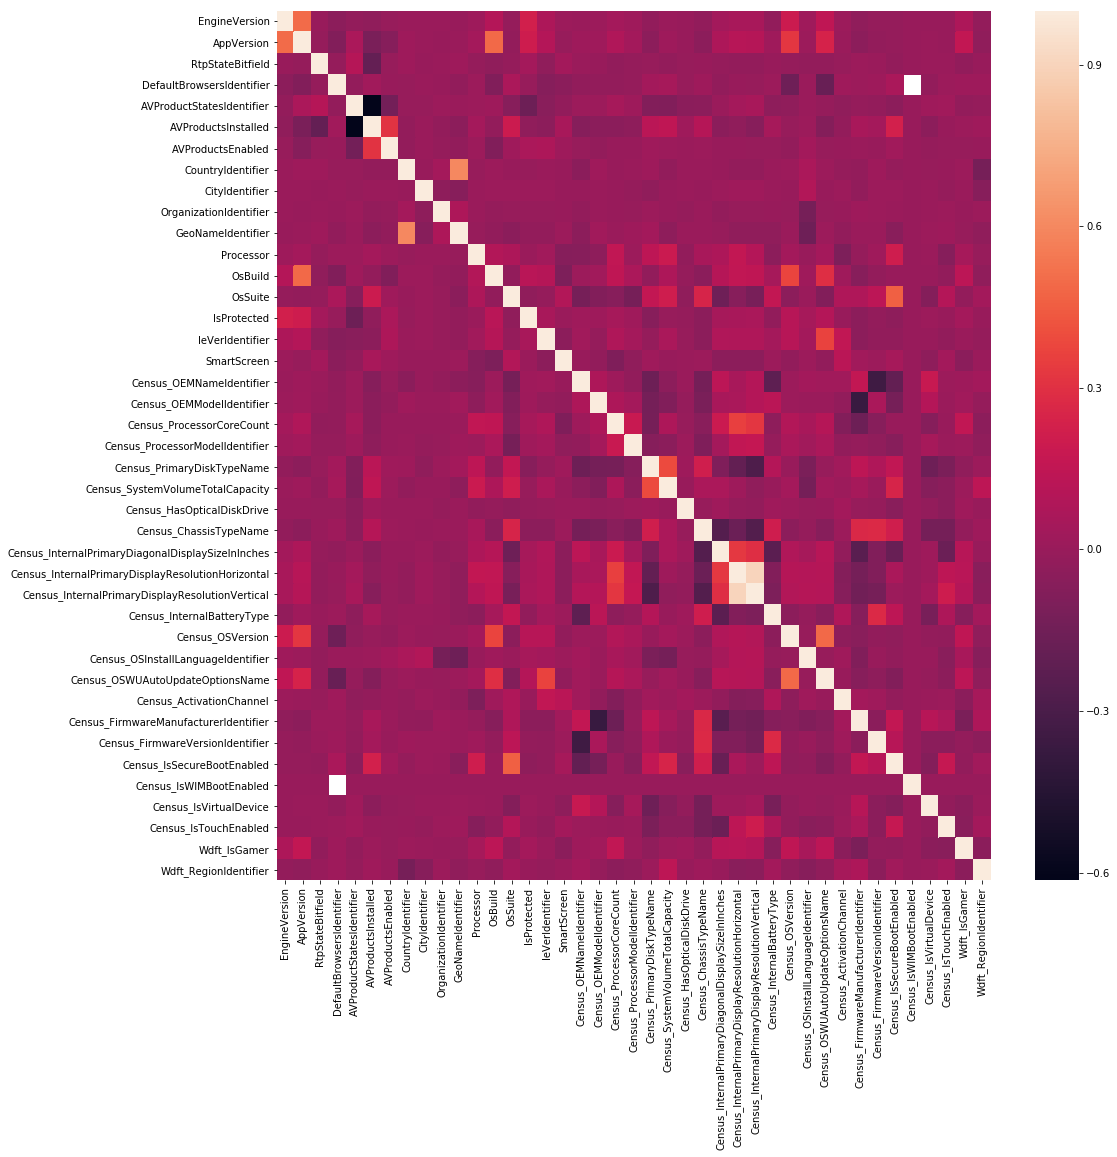

In [168]:
plt.figure(figsize=(16,16))
sb.heatmap(corr)

Since non-numeric data cannot participate in calculations, it is necessary to convert non-numeric data into numeric data.

First find the non-numeric column

In [84]:
object_columns=total_x.select_dtypes(exclude=np.number).columns

In [86]:
object_columns

Index(['EngineVersion', 'AppVersion', 'Processor', 'SmartScreen',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_InternalBatteryType', 'Census_OSVersion',
       'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel'],
      dtype='object')

Convert non-numeric columns to their data statistics

In [87]:
for c in object_columns:
    total_x[c]=total_x[c].map(total_x[c].value_counts())

In [88]:
total_x.shape

(8853253, 41)

Check the data information after conversion

In [91]:
total_x.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8853253 entries, 0 to 8853252
Data columns (total 41 columns):
EngineVersion                                        8853253 non-null int64
AppVersion                                           8853253 non-null int64
RtpStateBitfield                                     8817365 non-null float16
DefaultBrowsersIdentifier                            355422 non-null float16
AVProductStatesIdentifier                            8825393 non-null float32
AVProductsInstalled                                  8825393 non-null float16
AVProductsEnabled                                    8825393 non-null float16
CountryIdentifier                                    8853253 non-null int16
CityIdentifier                                       8624778 non-null float32
OrganizationIdentifier                               6062188 non-null float16
GeoNameIdentifier                                    8853087 non-null float16
Processor                           

In [92]:
total_x.head()

,EngineVersion,AppVersion,RtpStateBitfield,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_OSWUAutoUpdateOptionsName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,569779,1262763,7.0,NaN,53447.0,1.0,1.0,29,128035.0,18.0,...,2582502,4579823,628.0,36144.0,0,NaN,0.0,0,0.0,10.0
1,156382,259749,7.0,NaN,53447.0,1.0,1.0,93,1482.0,18.0,...,2582502,4579823,628.0,57858.0,0,NaN,0.0,0,0.0,8.0
2,569779,1262763,7.0,NaN,53447.0,1.0,1.0,86,153579.0,18.0,...,4556167,296760,142.0,52682.0,0,NaN,0.0,0,0.0,3.0
3,569779,1262763,7.0,NaN,53447.0,1.0,1.0,88,20710.0,NaN,...,4556167,296760,355.0,20050.0,0,NaN,0.0,0,0.0,3.0
4,569779,1262763,7.0,NaN,53447.0,1.0,1.0,18,37376.0,NaN,...,4556167,4579823,355.0,19844.0,0,0.0,0.0,0,0.0,1.0


In [95]:
label.shape

(1000000, 1)

In [97]:
total_x.describe()

,EngineVersion,AppVersion,RtpStateBitfield,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_OSWUAutoUpdateOptionsName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
count,8.853253e+06,8.853253e+06,8817365.0,355422.0,8.825393e+06,8825393.0,8825393.0,8.853253e+06,8.624778e+06,6062188.0,...,8.853253e+06,8.853253e+06,8634166.0,8.657741e+06,8.853253e+06,2.696833e+06,8834174.0,8.853253e+06,8516303.0,8516303.0
mean,1.963773e+06,1.591286e+06,NaN,NaN,5.130810e+04,NaN,NaN,1.092884e+02,8.044938e+04,NaN,...,3.334236e+06,3.600687e+06,NaN,3.236128e+04,4.553763e-01,3.576279e-07,NaN,1.190884e-01,NaN,NaN
std,1.032554e+06,1.059013e+06,0.0,NaN,1.249813e+04,0.0,0.0,6.317093e+01,4.881226e+04,0.0,...,1.355991e+06,1.279401e+06,NaN,2.115952e+04,4.980048e-01,5.979538e-04,0.0,3.238926e-01,0.0,0.0
min,1.000000e+00,1.000000e+00,0.0,1.0,2.000000e+00,1.0,0.0,1.000000e+00,1.000000e+00,1.0,...,1.261300e+04,2.749000e+03,1.0,5.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,1.0
25%,1.491273e+06,2.597490e+05,7.0,614.0,5.344700e+04,1.0,1.0,5.100000e+01,3.682500e+04,18.0,...,2.582502e+06,3.199269e+06,142.0,1.289700e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,3.0
50%,2.106236e+06,2.129928e+06,7.0,1632.0,5.344700e+04,1.0,1.0,9.700000e+01,8.237300e+04,27.0,...,4.556167e+06,4.579823e+06,486.0,3.306000e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,10.0
75%,3.114852e+06,2.740243e+06,7.0,2376.0,5.344700e+04,2.0,1.0,1.640000e+02,1.233670e+05,27.0,...,4.556167e+06,4.579823e+06,556.0,5.215200e+04,1.000000e+00,0.000000e+00,0.0,0.000000e+00,1.0,11.0
max,3.114852e+06,2.740243e+06,40.0,3214.0,7.050200e+04,6.0,5.0,2.220000e+02,1.679620e+05,52.0,...,4.556167e+06,4.579823e+06,1088.0,7.211100e+04,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0,15.0


Divide the data into training set and test set

In [116]:
train=total_x.iloc[:label.shape[0]]
test=total_x.iloc[label.shape[0]:]

Split the training set into training set and validation set for model tuning

In [118]:
train_x, valid_x, train_y, valid_y = train_test_split(train, label, test_size=0.333, random_state=0)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state =1)

Set the pre-parameters of the XGBoost model

In [135]:
parameters = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [200,500],
}

Use GridsearchCV to cross-validate the model and find the best parameters.

In the method of evaluating the model, we chose AUC. Because AUC is more suitable for the assessment of classification problems, in general, AUC is greater than 0.5.

In [137]:
xlf = XGBClassifier(max_depth=10,
                        learning_rate=0.01,
                        n_estimators=2000,
                        objective='binary:logistic',
                        nthread=-1,
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        missing=None)

gsearch = GridSearchCV(xlf, param_grid=parameters, scoring='roc_auc', cv=3,verbose=100000)
gsearch.fit(train_x, train_y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.6862275731523466, total=  42.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.9s remaining:    0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.6850875076067068, total=  45.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.6853661202218426, total=  43.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=5, n_est

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=1,
       colsample_bynode=None, colsample_bytree=0.7, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=10,
       min_child_weight=1, mis...ght=1, seed=1440, subsample=0.85,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10], 'learning_rate': [0.01, 0.05], 'n_estimators': [200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=100000)

You can see that the best parameters are:

learning_rate: 0.05

max_depth: 10

n_estimators: 500

In [138]:

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.716
Best parameters set:
	learning_rate: 0.05
	max_depth: 10
	n_estimators: 500


Use the above parameters to test the test set,

In [139]:
final_model=XGBClassifier(learning_rate=0.05,max_depth=10,n_estimators=500)

In [143]:
final_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [144]:
pred_prob=final_model.predict_proba(valid_x)

In [155]:
pred=final_model.predict(valid_x)

In [147]:
valid_x.shape

(333000, 41)

In [148]:
valid_y.shape

(333000, 1)

In [150]:
pred_prob.shape

(333000, 2)

It can be seen that the AUC is 0.72 and the performance is better,and the F1 score is 0.6553.

AUC is still used as the classification evaluation standard here, first of all because AUC is a commonly used classification evaluation standard in many kaggle competitions, and compared to F1, it is more fair in judging unbalanced data.

In [151]:
'AUC score: %.4f'%roc_auc_score(valid_y,pred_prob[:,1])

'AUC score: 0.7200'

In [156]:
'F1 score: %.4f'%f1_score(valid_y,pred)

'F1 score: 0.6553'

In [159]:
fpr,tpr,threshold = roc_curve(valid_y,pred_prob[:,1]) 

It can be seen from the ROC curve that the classification effect is better.

<Figure size 432x288 with 0 Axes>

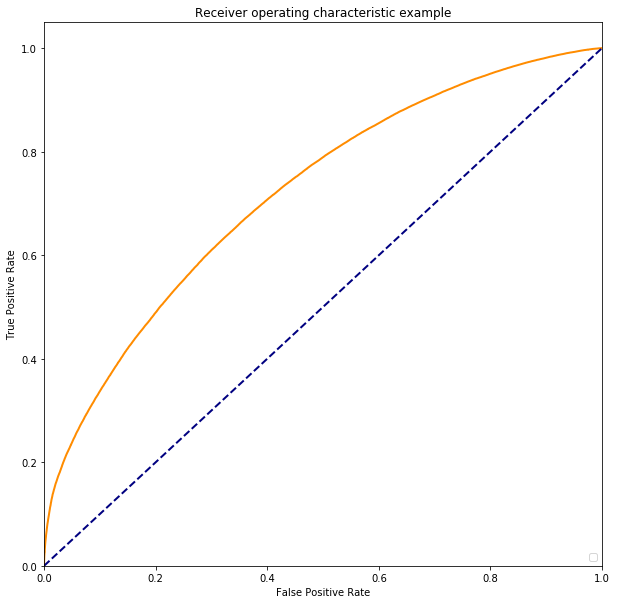

In [162]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',lw=lw ) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");


Due to the limitation of computer performance, the parameter settings for the model are relatively rough this time, and the optimal parameters cannot be accurately found. At the same time, the training data used is also less, which reduces the generalization ability of the model, but 0.72 The AUC value is still satisfactory.